In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

class GenePresenceAbsencePlotter:
    def __init__(self, path_csv):
        self.path_csv = path_csv
        self.df_binary = None
        self.df_selected = None
        self.pattern_counts = None

    def load_and_process_data(self):
        # Load the data
        df = pd.read_csv(self.path_csv, sep=',', index_col=0)
        
        # Isolate the binary presence/absence data for genes across strains
        index_avg_group_size = df.columns.get_loc('Avg group size nuc')
        self.df_binary = df.iloc[:, index_avg_group_size+1:].notna().astype(int)

    def identify_unique_patterns(self):
        # Transpose df_binary so that genes are columns and strains are rows
        df_transposed = self.df_binary.transpose()
        
        # Create a summary representation for each strain
        pattern_strings = df_transposed.apply(lambda x: ''.join(x.astype(str)), axis=1)
        self.pattern_counts = pattern_strings.value_counts()
        
        # Select representative strains
        representative_strains = pattern_strings.drop_duplicates()
        self.df_selected = df_transposed.loc[representative_strains.index]

    def plot_heatmap(self):
        # Create a custom color map for the heatmap
        cmap = ListedColormap(['#ffffd9', '#41b6c4'])  # Yellow for absence (0), Blue for presence (1)
        
        # Plotting the heatmap
        plt.figure(figsize=(20, 10))
        ax = sns.heatmap(self.df_selected, cmap=cmap, cbar=True, xticklabels=True, yticklabels=True,
                         cbar_kws={'ticks': [0, 1], 'label': 'Gene Presence/Absence'})
        
        # Customize the color bar to show "Absent" and "Present" labels
        cbar = ax.collections[0].colorbar
        cbar.set_ticklabels(['Absent', 'Present'])
        
        # Adjusting the annotation process to match strain names with their counts
        for i, (index_value, row) in enumerate(self.df_selected.iterrows()):
            pattern = ''.join(row.astype(str))
            count = self.pattern_counts[pattern]
            plt.text(0.5, i + 0.5, f'Count: {count}', ha='center', va='center', color='black', fontsize=7)
    
        plt.title('Heatmap of Gene Presence/Absence Across Selected Strains')
        plt.xlabel('Genes')
        plt.ylabel('Selected Strains (Unique Patterns)')
        plt.xticks(rotation=90)  # Rotate gene labels for better readability
        plt.show()

### Capsule heatmap gene presence/absence

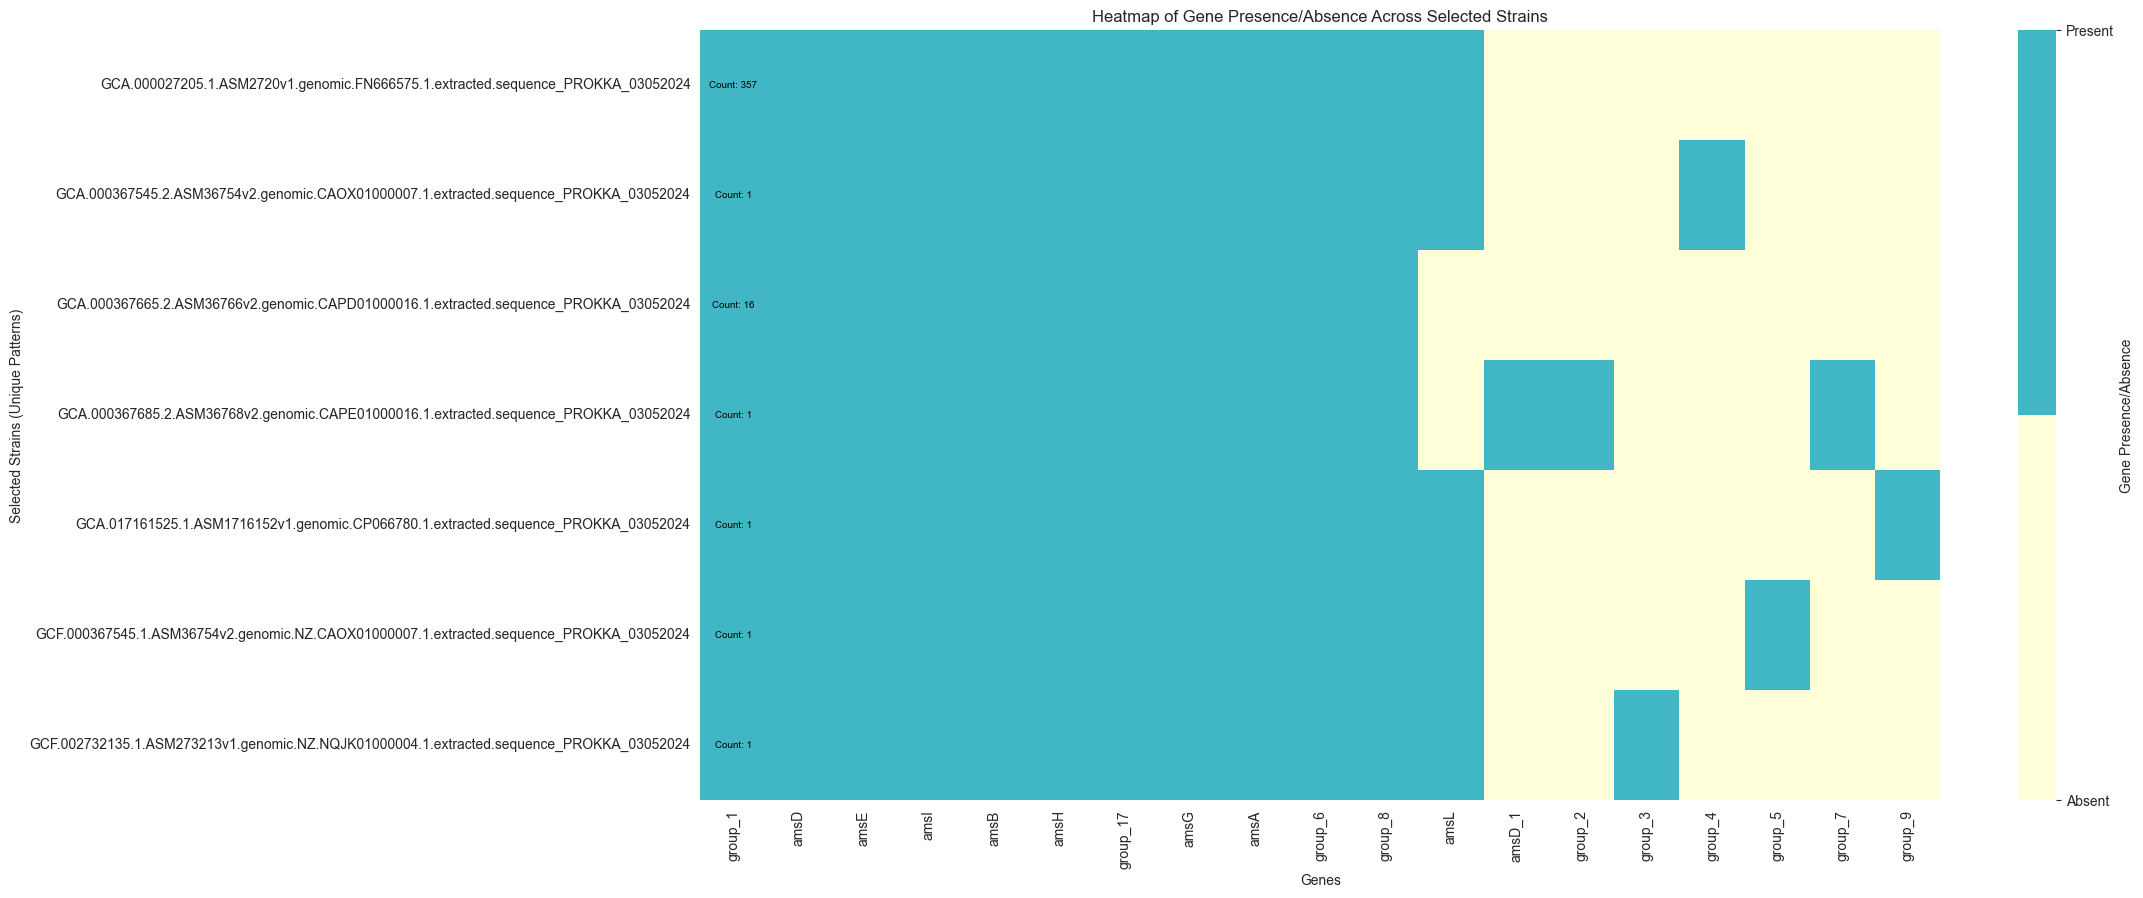

In [20]:
path_csv_file = '/Users/josediogomoura/Documents/BioFago/BioFago/data/ApproachFlankGenes/capsule/roary/capsule_1709660637/gene_presence_absence.csv'

plotter = GenePresenceAbsencePlotter(path_csv_file)
plotter.load_and_process_data()
plotter.identify_unique_patterns()
plotter.plot_heatmap()

### Cellulose heatmap gene presence/absence

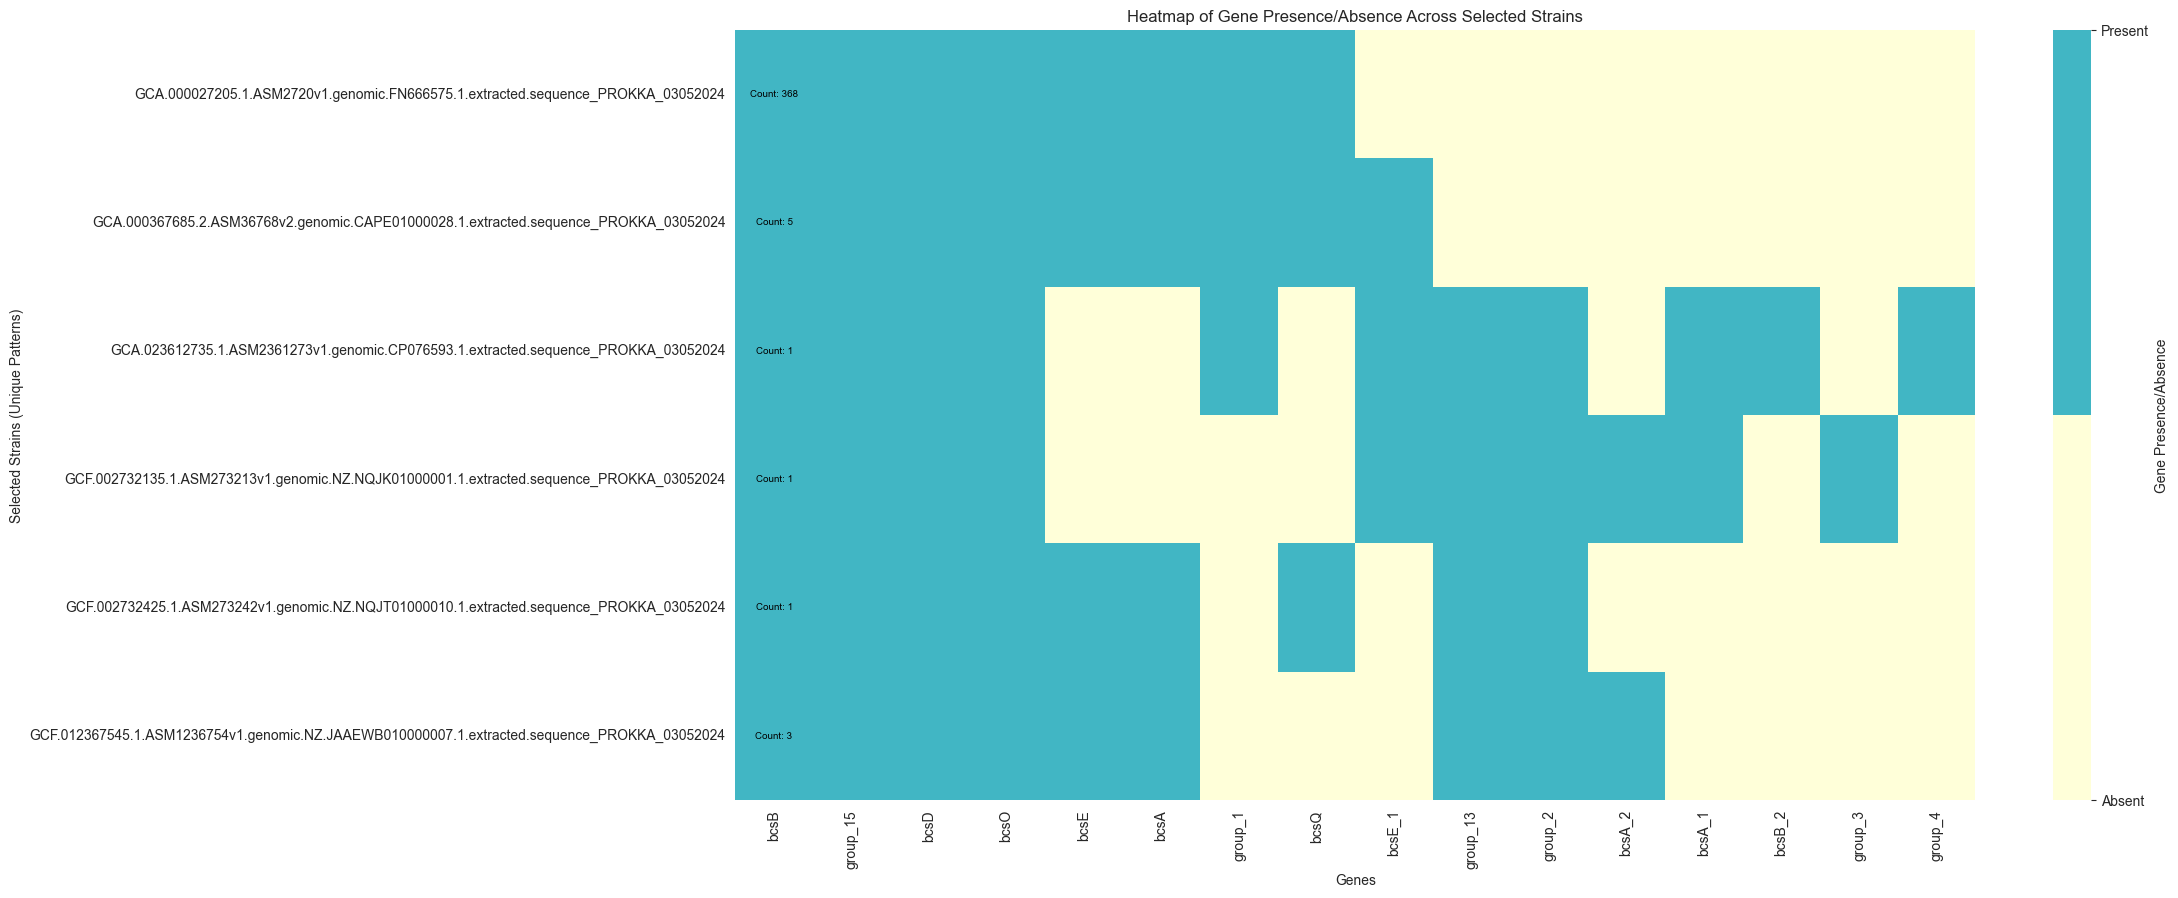

In [18]:
path_csv = '/Users/josediogomoura/Documents/BioFago/BioFago/data/ApproachFlankGenes/cellulose/roary_1709664041/gene_presence_absence.csv'  # Make sure to use the correct path
plotter = GenePresenceAbsencePlotter(path_csv)
plotter.load_and_process_data()
plotter.identify_unique_patterns()
plotter.plot_heatmap()

### LPS heatmap gene presence/absence


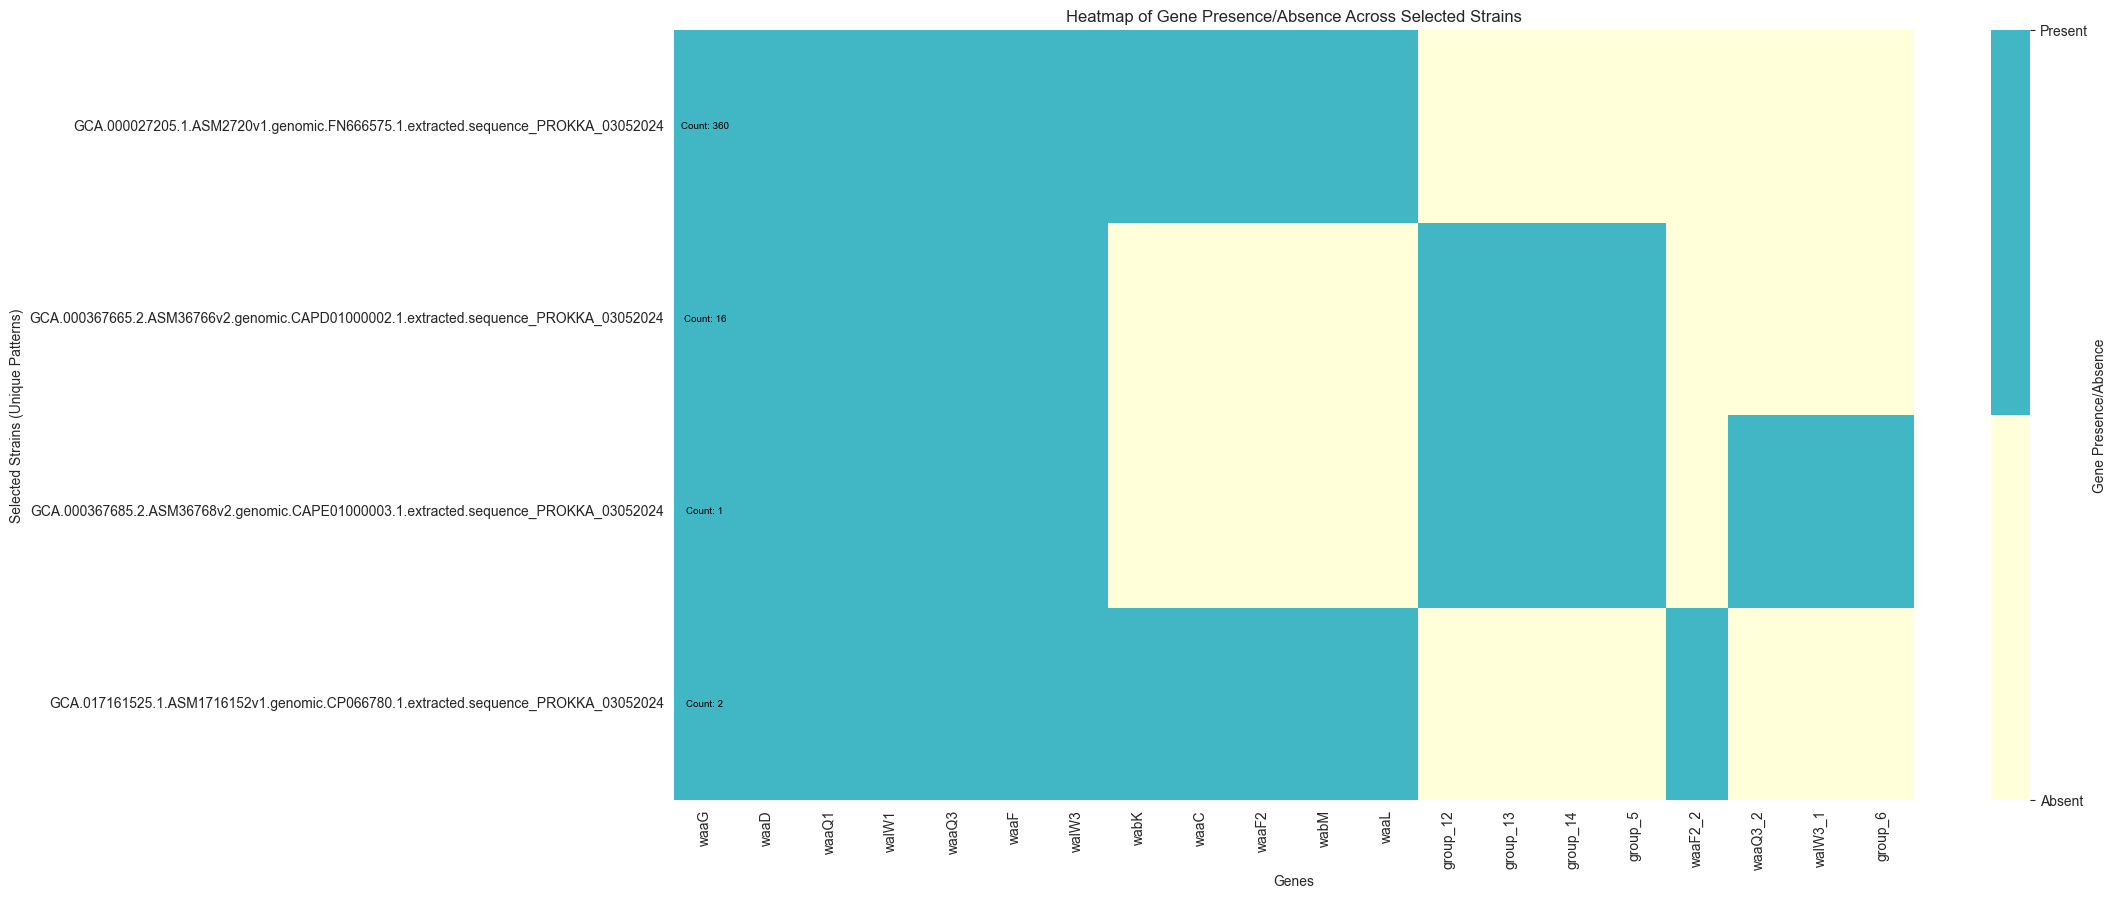

In [21]:
path_csv = '/Users/josediogomoura/Documents/BioFago/BioFago/data/ApproachFlankGenes/lps/roary_1709673374/gene_presence_absence.csv'  # Make sure to use the correct path
plotter = GenePresenceAbsencePlotter(path_csv)
plotter.load_and_process_data()
plotter.identify_unique_patterns()
plotter.plot_heatmap()

### Another kind of visualisation

In [27]:
import pandas as pd
from collections import defaultdict

def analyze_gene_presence_patterns(csv_file_path):
    df = pd.read_csv(csv_file_path)

    strains_dict = {}

    # Iterate over the DataFrame rows
    for _, row in df.iterrows():
        gene = row['Gene']  # Get the gene name

        # Iterate over each strain (starting from the 'Avg group size nuc' column)
        for strain in df.columns[14:]:
            if pd.notnull(row[strain]):
                if strain not in strains_dict:
                    strains_dict[strain] = set()
                strains_dict[strain].add(gene)

    unique_patterns = defaultdict(lambda: {'strains': [], 'count': 0})

    # Function to convert the strain data into a hashable form (to use as dictionary keys)
    def pattern_to_key(pattern):
        return tuple(sorted(pattern))

    # Group strains by their unique gene pattern
    for strain, genes in strains_dict.items():
        pattern_key = pattern_to_key(genes)
        unique_patterns[pattern_key]['strains'].append(strain)
        unique_patterns[pattern_key]['count'] += 1

    # Output the unique patterns and their counts (genes only, no annotations)
    for pattern, data in unique_patterns.items():
        print(f'Pattern: {pattern}, Count: {data["count"]}')

### Capsule

In [28]:
analyze_gene_presence_patterns("/Users/josediogomoura/Documents/BioFago/BioFago/data/ApproachFlankGenes/capsule/roary/capsule_1709660637/gene_presence_absence.csv")

Pattern: ('amsA', 'amsB', 'amsD', 'amsE', 'amsG', 'amsH', 'amsI', 'amsL', 'group_1', 'group_17', 'group_6', 'group_8'), Count: 357
Pattern: ('amsA', 'amsB', 'amsD', 'amsE', 'amsG', 'amsH', 'amsI', 'amsL', 'group_1', 'group_17', 'group_4', 'group_6', 'group_8'), Count: 1
Pattern: ('amsA', 'amsB', 'amsD', 'amsE', 'amsG', 'amsH', 'amsI', 'group_1', 'group_17', 'group_6', 'group_8'), Count: 16
Pattern: ('amsA', 'amsB', 'amsD', 'amsD_1', 'amsE', 'amsG', 'amsH', 'amsI', 'group_1', 'group_17', 'group_2', 'group_6', 'group_7', 'group_8'), Count: 1
Pattern: ('amsA', 'amsB', 'amsD', 'amsE', 'amsG', 'amsH', 'amsI', 'amsL', 'group_1', 'group_17', 'group_6', 'group_8', 'group_9'), Count: 1
Pattern: ('amsA', 'amsB', 'amsD', 'amsE', 'amsG', 'amsH', 'amsI', 'amsL', 'group_1', 'group_17', 'group_5', 'group_6', 'group_8'), Count: 1
Pattern: ('amsA', 'amsB', 'amsD', 'amsE', 'amsG', 'amsH', 'amsI', 'amsL', 'group_1', 'group_17', 'group_3', 'group_6', 'group_8'), Count: 1


### Cellulose

In [29]:
analyze_gene_presence_patterns("/Users/josediogomoura/Documents/BioFago/BioFago/data/ApproachFlankGenes/cellulose/roary_1709664041/gene_presence_absence.csv")

Pattern: ('bcsA', 'bcsB', 'bcsD', 'bcsE', 'bcsO', 'bcsQ', 'group_1', 'group_15'), Count: 368
Pattern: ('bcsA', 'bcsB', 'bcsD', 'bcsE', 'bcsE_1', 'bcsO', 'bcsQ', 'group_1', 'group_15'), Count: 5
Pattern: ('bcsA_1', 'bcsB', 'bcsB_2', 'bcsD', 'bcsE_1', 'bcsO', 'group_1', 'group_13', 'group_15', 'group_2', 'group_4'), Count: 1
Pattern: ('bcsA_1', 'bcsA_2', 'bcsB', 'bcsD', 'bcsE_1', 'bcsO', 'group_13', 'group_15', 'group_2', 'group_3'), Count: 1
Pattern: ('bcsA', 'bcsB', 'bcsD', 'bcsE', 'bcsO', 'bcsQ', 'group_13', 'group_15', 'group_2'), Count: 1
Pattern: ('bcsA', 'bcsA_2', 'bcsB', 'bcsD', 'bcsE', 'bcsO', 'group_13', 'group_15', 'group_2'), Count: 3


### LPS

In [31]:
analyze_gene_presence_patterns("/Users/josediogomoura/Documents/BioFago/BioFago/data/ApproachFlankGenes/lps/roary_1709673374/gene_presence_absence.csv")

Pattern: ('waaC', 'waaD', 'waaF', 'waaF2', 'waaG', 'waaL', 'waaQ1', 'waaQ3', 'wabK', 'wabM', 'walW1', 'walW3'), Count: 360
Pattern: ('group_12', 'group_13', 'group_14', 'group_5', 'waaD', 'waaF', 'waaG', 'waaQ1', 'waaQ3', 'walW1', 'walW3'), Count: 16
Pattern: ('group_12', 'group_13', 'group_14', 'group_5', 'group_6', 'waaD', 'waaF', 'waaG', 'waaQ1', 'waaQ3', 'waaQ3_2', 'walW1', 'walW3', 'walW3_1'), Count: 1
Pattern: ('waaC', 'waaD', 'waaF', 'waaF2', 'waaF2_2', 'waaG', 'waaL', 'waaQ1', 'waaQ3', 'wabK', 'wabM', 'walW1', 'walW3'), Count: 2
